<a href="https://colab.research.google.com/github/HemantAjmer/Demo_Repo/blob/main/Wtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
import seaborn as sns
df=df=sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Line plot

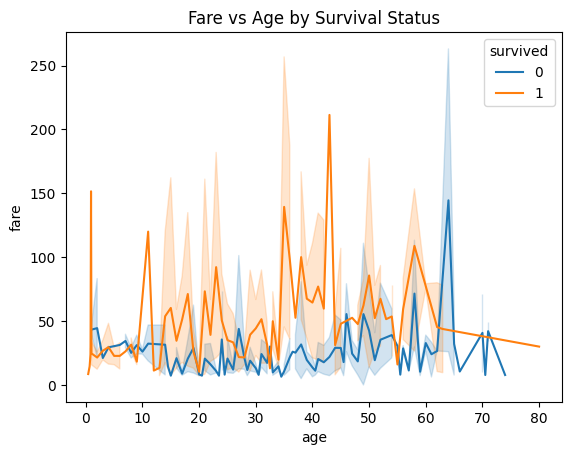

In [ ]:
sns.lineplot(x='age', y='fare', hue='survived', data=df)
plt.title('Fare vs Age by Survival Status')
plt.show()

# Bar plot

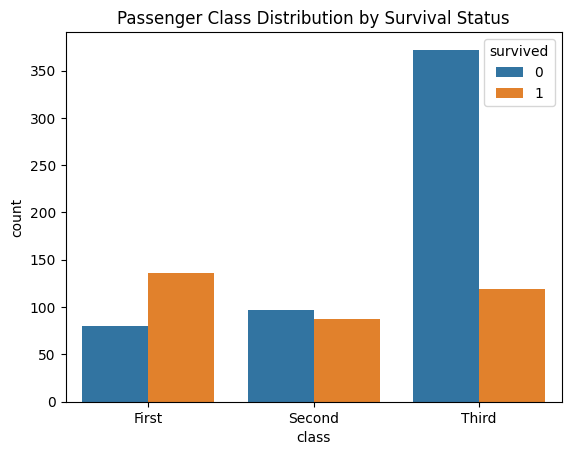

In [ ]:
sns.countplot(x='class', hue='survived', data=df)
plt.title('Passenger Class Distribution by Survival Status')
plt.show()

# 3D Bar-Plot

<ipython-input-5-bc88e4276d76>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_counts=df.groupby(['class', 'sex', 'survived']).size().unstack()


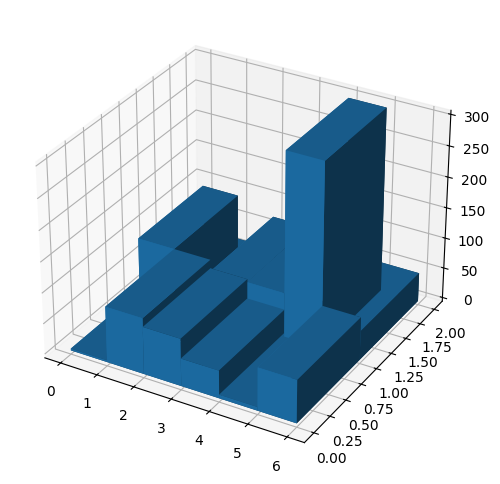

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111, projection='3d')
survived_counts=df.groupby(['class', 'sex', 'survived']).size().unstack()
x=np.arange(len(survived_counts.index))
y=np.arange(len(survived_counts.columns))
X,Y=np.meshgrid(x,y)
Z=survived_counts.values
ax.bar3d(X.ravel(), Y.ravel(), np.zeros(len(Z.ravel())), 1, 1, Z.ravel(), shade=True)
plt.show()

# Histogram

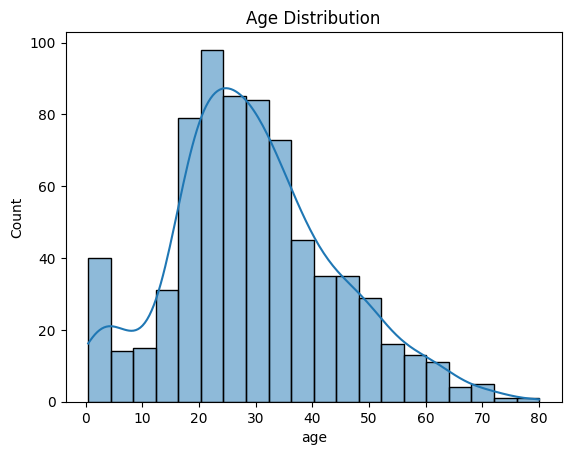

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


# Scatter Plot

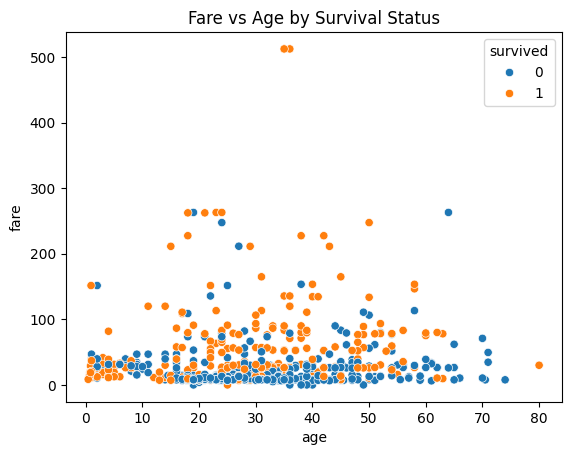

In [ ]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Fare vs Age by Survival Status')
plt.show()

# 3D Scatter Plot

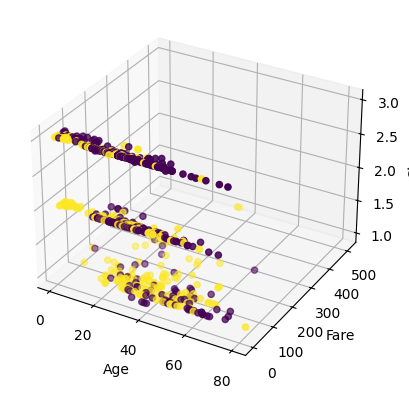

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['fare'], df['pclass'], c=df['survived'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Class')
plt.show()

# Stack Plot

<ipython-input-9-88ced2bd7ad5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['fare_cumsum'] = df.groupby('class')['fare'].cumsum()
<ipython-input-9-88ced2bd7ad5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['class', 'fare_cumsum']).size().unstack().plot(kind='area', stacked=True)


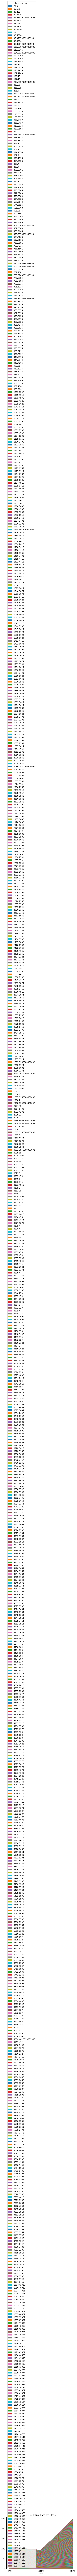

In [ ]:
df['fare_cumsum'] = df.groupby('class')['fare'].cumsum()
df.groupby(['class', 'fare_cumsum']).size().unstack().plot(kind='area', stacked=True)
plt.title('Cumulative Fare by Class')
plt.show()

# Pie Chart

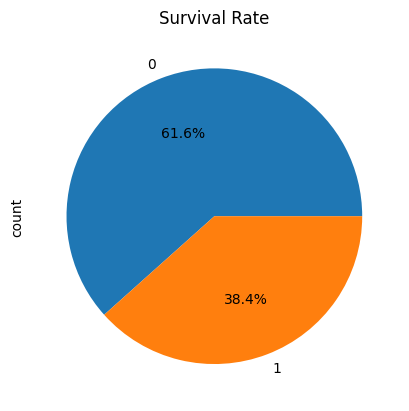

In [ ]:
df['survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Survival Rate')
plt.show()

# Sub-plots

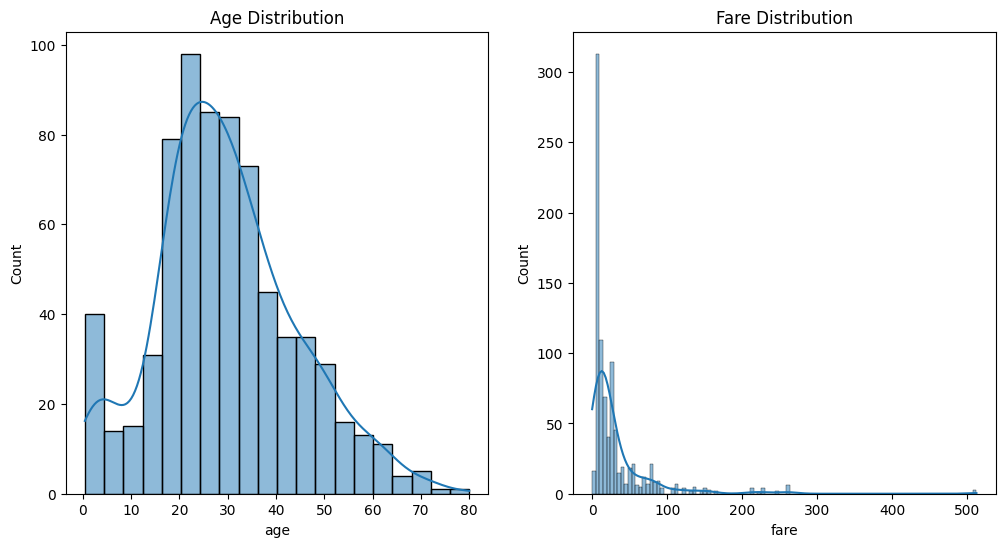

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(df['fare'], kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.show()

# Wireframe

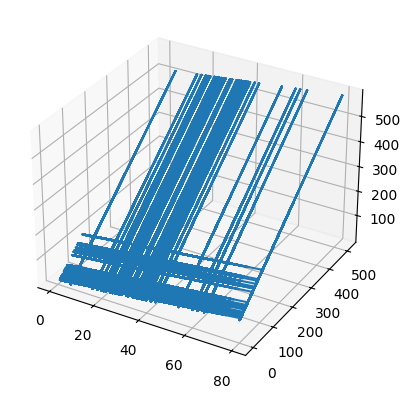

In [ ]:
X, Y = np.meshgrid(df['age'], df['fare'])
Z = X+Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,Z)
plt.show()


# Heatmap

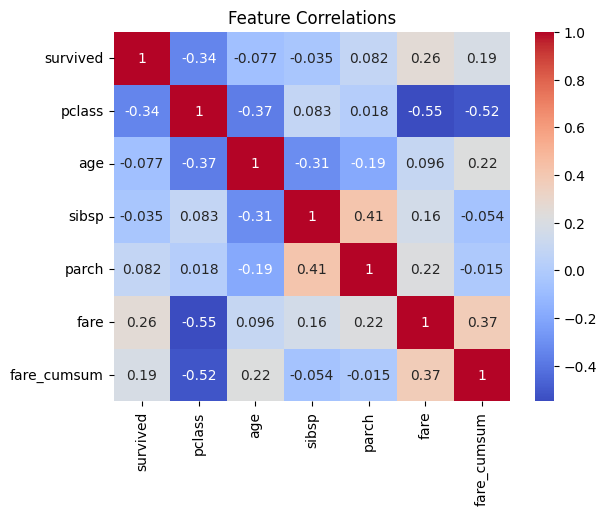

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Join Plot

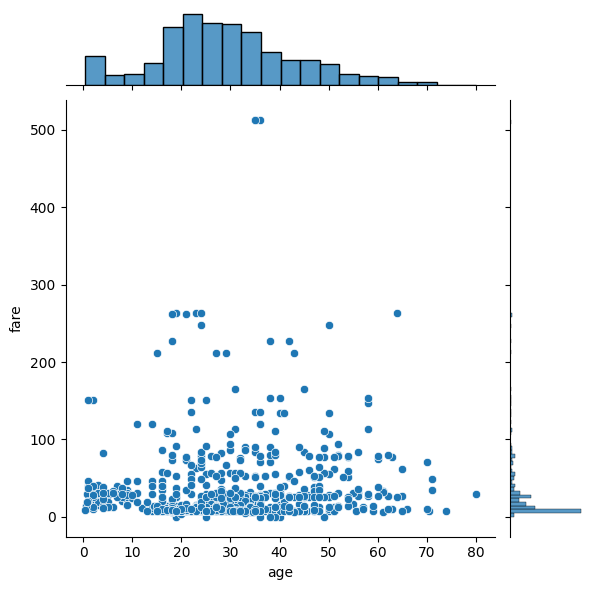

In [ ]:
sns.jointplot(x='age', y='fare', data=df, kind='scatter')
plt.show()

# Violin Plot

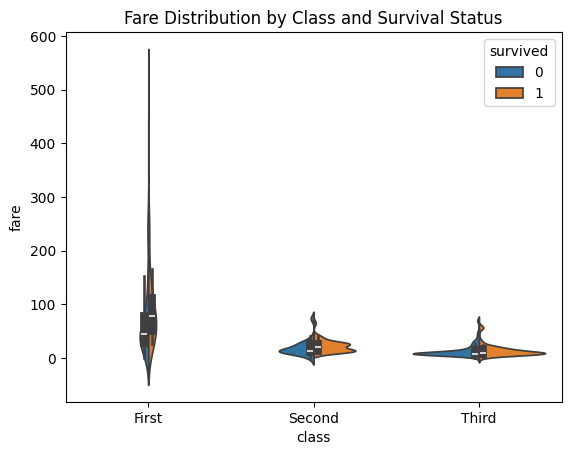

In [ ]:
sns.violinplot(x='class', y='fare', hue='survived', split=True, data=df)
plt.title('Fare Distribution by Class and Survival Status')
plt.show()


# Box Plot

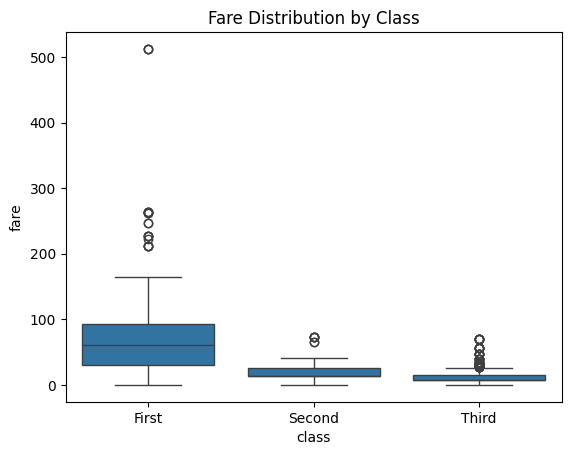

In [ ]:
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution by Class')
plt.show()

# Bubble Plot

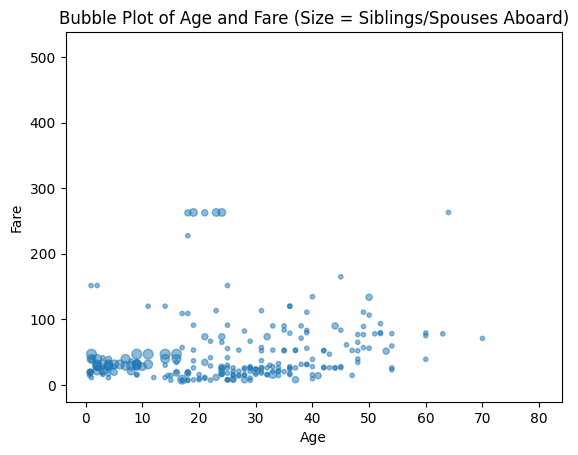

In [19]:
plt.scatter(df['age'], df['fare'], s=df['sibsp']*10, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Bubble Plot of Age and Fare (Size = Siblings/Spouses Aboard)')
plt.show()

# Venn Plot

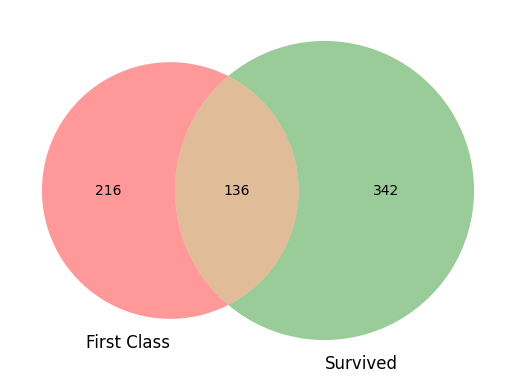

In [20]:
from matplotlib_venn import venn2
venn2(subsets=(len(df[df['class']=='First']), len(df[df['survived']==1]), len(df[(df['class'] == 'First') & (df['survived']==1)])), set_labels=('First Class', 'Survived'))
plt.show()